In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

Logistic Regression Accuracy: 1.0
K-Nearest Neighbors Accuracy: 0.7407407407407407


In [5]:
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

print("\nConfusion Matrix (K-Nearest Neighbors):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (K-Nearest Neighbors):")
print(classification_report(y_test, y_pred_knn, target_names=target_names))


Confusion Matrix (Logistic Regression):
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Confusion Matrix (K-Nearest Neighbors):
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]

Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74  

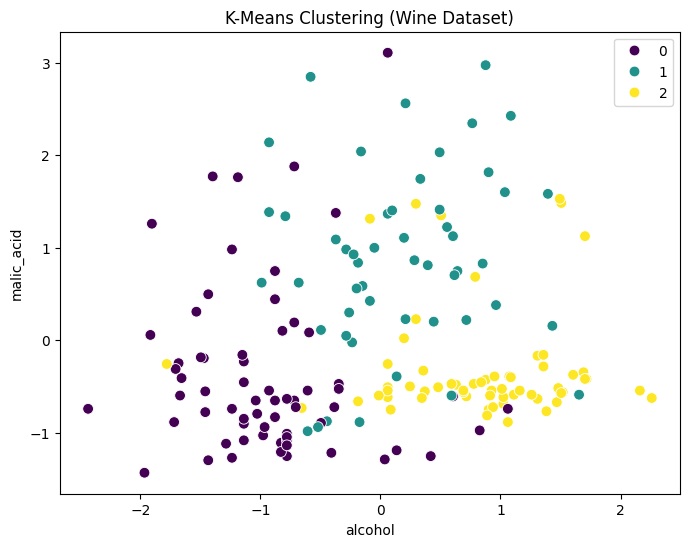

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='viridis', s=60)
plt.title("K-Means Clustering (Wine Dataset)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

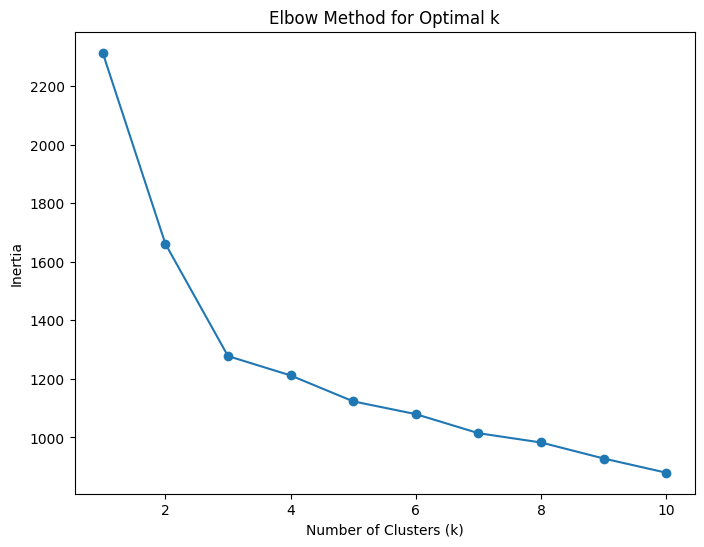

In [7]:
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

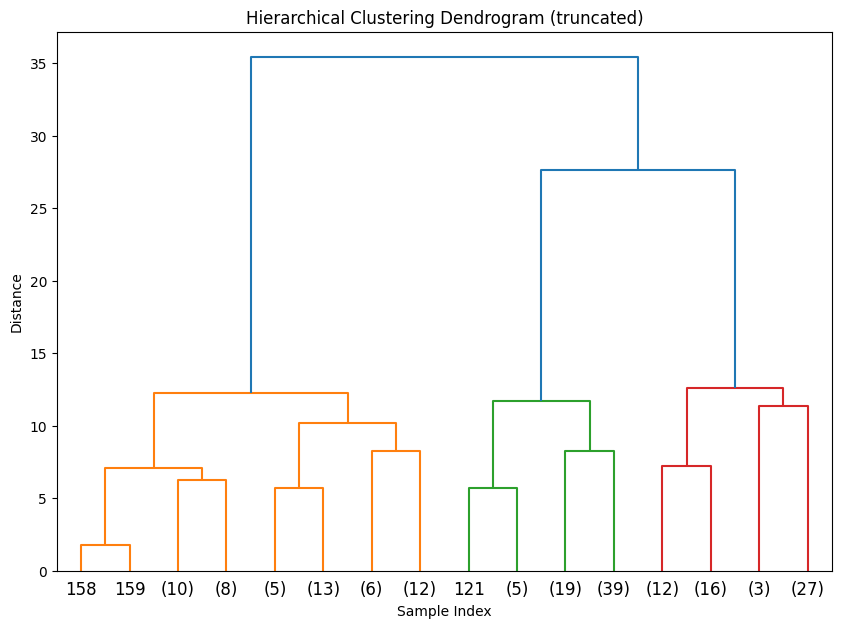

In [8]:
hierarchical = AgglomerativeClustering(n_clusters=3)
y_hierarchical = hierarchical.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

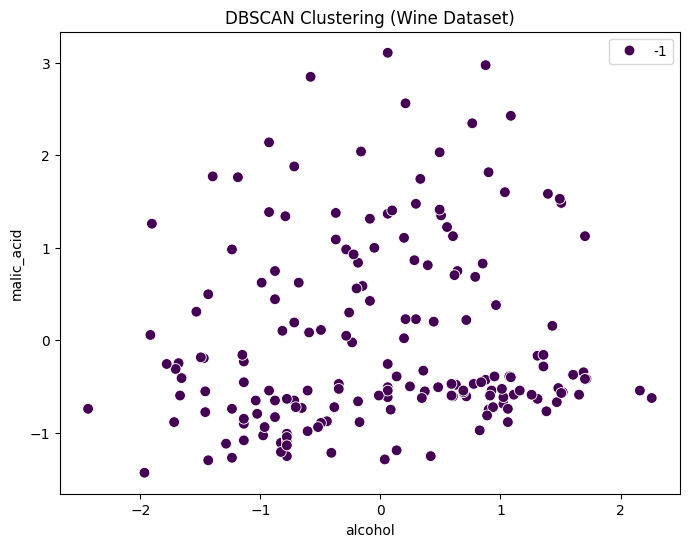

DBSCAN produced 1 unique clusters (including noise points)
Clusters identified by DBSCAN: [-1]


In [9]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_dbscan, palette='viridis', s=60)
plt.title("DBSCAN Clustering (Wine Dataset)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

unique_labels = np.unique(y_dbscan)
print("DBSCAN produced", len(unique_labels), "unique clusters (including noise points)")
print("Clusters identified by DBSCAN:", unique_labels)